<a href="https://colab.research.google.com/github/weedge/doraemon-nb/blob/main/kimi_VL_A3B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kimi-vl
nice work~!

- https://huggingface.co/moonshotai/Kimi-VL-A3B-Thinking
- https://huggingface.co/moonshotai/Kimi-VL-A3B-Instruct
- https://github.com/MoonshotAI/Kimi-VL/blob/main/Kimi-VL.pdf

total 16G params need 32 G VRAM, use A100

In [4]:
!python --version

Python 3.11.11


In [4]:
!pip install -q tiktoken blobfile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 71.1 MB/s eta 0:00:00


In [5]:
!pip show transformers accelerate torch tiktoken blobfile

Name: transformers
Version: 4.50.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: peft, sentence-transformers
---
Name: accelerate
Version: 1.5.2
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: zach.mueller@huggingface.co
License: Apache
Location: /usr/local/lib/python3.11/dist-packages
Requires: huggingface-hub, numpy, packaging, psutil, pyyaml, safetensors, torch
Required-by: peft
---
Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic ne

# download

In [1]:
!huggingface-cli download --quie moonshotai/Kimi-VL-A3B-Thinking --local-dir /content/models/moonshotai/Kimi-VL-A3B-Thinking

/content/models/moonshotai/Kimi-VL-A3B-Thinking


In [2]:
!huggingface-cli download --quie moonshotai/Kimi-VL-A3B-Instruct --local-dir /content/models/moonshotai/Kimi-VL-A3B-Instruct

/content/models/moonshotai/Kimi-VL-A3B-Instruct


# inference

🤗 For general multimodal perception and understanding, OCR, long video and long document, video perception, and agent uses, we recommend Kimi-VL-A3B-Instruct for efficient inference; for advanced text and multimodal reasoning (e.g. math), please consider using Kimi-VL-A3B-Thinking.

🤗 对于一般的多模态感知与理解、OCR、长视频和长文档、视频感知以及代理用途，我们推荐使用 Kimi-VL-A3B-Instruct 进行高效推理；对于高级文本和多模态推理（例如数学），请考虑使用 Kimi-VL-A3B-Thinking 。

## thinking



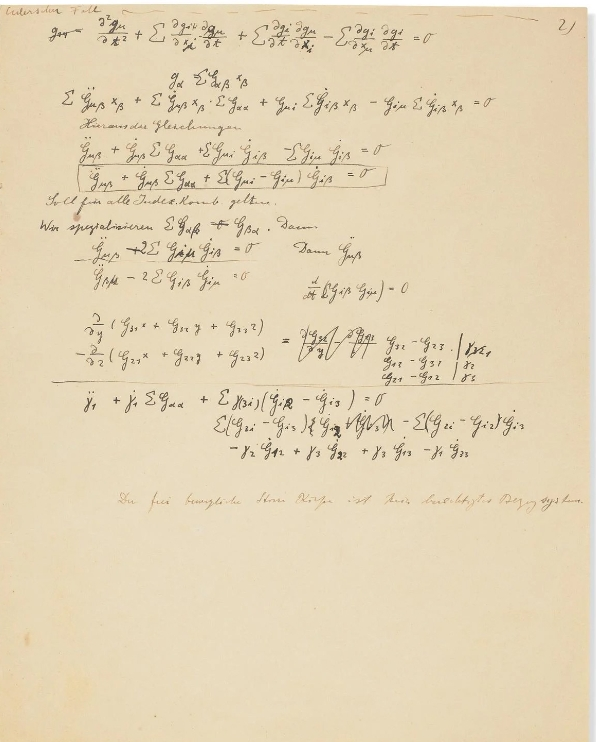

In [7]:
from IPython.display import Image
Image('/content/models/moonshotai/Kimi-VL-A3B-Thinking/figures/demo1.png')


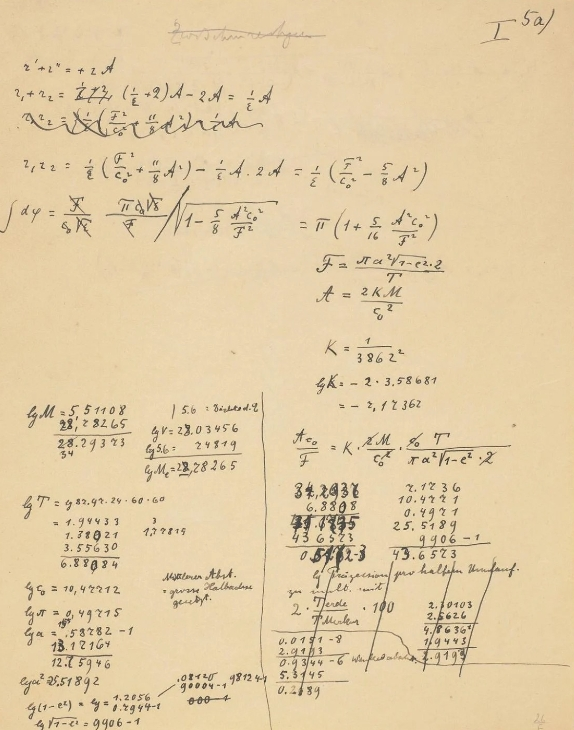

In [6]:
Image('/content/models/moonshotai/Kimi-VL-A3B-Thinking/figures/demo2.png')

In [1]:
from PIL import Image
from transformers import AutoModelForCausalLM, AutoProcessor

model_path = "/content/models/moonshotai/Kimi-VL-A3B-Thinking"
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    torch_dtype="auto",
    device_map="auto",
    trust_remote_code=True,
)
processor = AutoProcessor.from_pretrained(model_path, trust_remote_code=True)

image_paths = ["/content/models/moonshotai/Kimi-VL-A3B-Thinking/figures/demo1.png", "/content/models/moonshotai/Kimi-VL-A3B-Thinking/figures/demo2.png"]
images = [Image.open(path) for path in image_paths]

# english
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": image_path} for image_path in image_paths
        ] + [{"type": "text", "text": "Please infer step by step who this manuscript belongs to and what it records"}],
    },
]
text = processor.apply_chat_template(messages, add_generation_prompt=True, return_tensors="pt")
inputs = processor(images=images, text=text, return_tensors="pt", padding=True, truncation=True).to(model.device)
generated_ids = model.generate(**inputs, max_new_tokens=2048)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
response = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)[0]
print(response)

# chinese
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": image_path} for image_path in image_paths
        ] + [{"type": "text", "text": "请一步步推断这份手稿属于谁，记录了什么"}],
    },
]
text = processor.apply_chat_template(messages, add_generation_prompt=True, return_tensors="pt")
inputs = processor(images=images, text=text, return_tensors="pt", padding=True, truncation=True).to(model.device)
generated_ids = model.generate(**inputs, max_new_tokens=2048)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
response = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)[0]
print(response)



Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

◁think▷Okay, let's try to figure out who this manuscript belongs to and what it records. First, I'll look at the content. The images show handwritten mathematical equations and notes. The equations look advanced, possibly involving calculus, differential equations, or tensor calculus. There are terms like "Σ", "∂", "d/dx", and references to variables like "g", "Γ", "A", "K", "M", "T", and "c₀". These symbols are common in physics and engineering, especially in areas like general relativity, continuum mechanics, or tensor analysis.

Looking at the structure, the first image has a series of equations that seem to be set up for solving a system, maybe using variational principles or differential equations. The second image has more numerical values and constants, possibly results of calculations. The presence of terms like "Γ" (which could be Christoffel symbols in differential geometry) and references to "A", "K", "M", "T" might indicate work related to Einstein's field equations or simi

## instruct

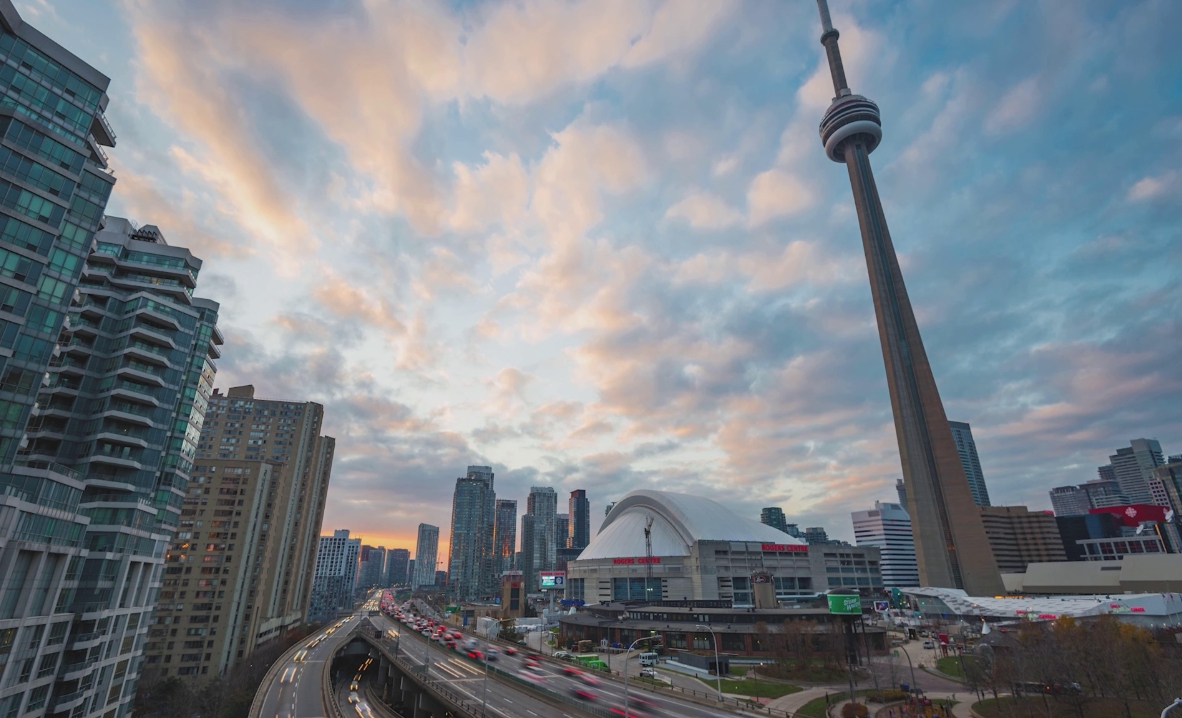

In [2]:
from IPython.display import Image
Image('/content/models/moonshotai/Kimi-VL-A3B-Instruct/figures/demo.png')

In [1]:
from PIL import Image
from transformers import AutoModelForCausalLM, AutoProcessor

model_path = "/content/models/moonshotai/Kimi-VL-A3B-Instruct"
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    torch_dtype="auto",
    device_map="auto",
    trust_remote_code=True,
)
processor = AutoProcessor.from_pretrained(model_path, trust_remote_code=True)

image_path = "/content/models/moonshotai/Kimi-VL-A3B-Instruct/figures/demo.png"
image = Image.open(image_path)
# english
messages = [
    {"role": "user", "content": [{"type": "image", "image": image_path}, {"type": "text", "text": "What is the dome building in the picture? Think step by step."}]}
]
text = processor.apply_chat_template(messages, add_generation_prompt=True, return_tensors="pt")
inputs = processor(images=image, text=text, return_tensors="pt", padding=True, truncation=True).to(model.device)
generated_ids = model.generate(**inputs, max_new_tokens=512)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
response = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)[0]
print(response)

# chinese
messages = [
    {"role": "user", "content": [{"type": "image", "image": image_path}, {"type": "text", "text": "图中的圆顶建筑是什么？一步一步地思考一下。"}]}
]
text = processor.apply_chat_template(messages, add_generation_prompt=True, return_tensors="pt")
inputs = processor(images=image, text=text, return_tensors="pt", padding=True, truncation=True).to(model.device)
generated_ids = model.generate(**inputs, max_new_tokens=512)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
response = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)[0]
print(response)


Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

To identify the dome building in the picture, we need to analyze the visual elements and context provided in the image. Here are the detailed steps:

1. **Observation of the Building**: The building in question has a distinctive white dome structure. This dome is a key feature that stands out among the surrounding buildings.

2. **Contextual Clues**: The image shows a cityscape with a prominent tower in the background, which is the CN Tower. This helps to narrow down the location to Toronto, Canada.

3. **Identification of the Dome**: The white dome building is located near the CN Tower and has a unique architectural design. It is situated in a prominent area of the city, which is the Rogers Centre.

4. **Conclusion**: Combining the visual features and contextual clues, the dome building in the picture is the Rogers Centre, which is home to the Toronto Blue Jays baseball team and hosts various other events.

Therefore, the dome building in the picture is the Rogers Centre.
图中的圆顶建筑是加拿大国